# General rules
1. Ask any questions anytime
2. It's fine to search for library usage
3. It's fine to skip a question

# Part 1. Tiny case study

number of occurrence: [178 182 177 183 181 182 181 179 174 180]


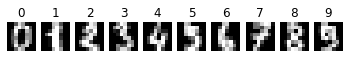

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt


x, y = load_digits(return_X_y=True)
print('number of occurrence:', np.bincount(y))

_, axarr = plt.subplots(1, 10)
for i in range(10):
    axarr[i].imshow(x[i].reshape(8, 8), cmap='gray')
    axarr[i].set_title(y[i])
    axarr[i].axis('off')

# 50/50 train/test split
x_train = x[::2]
x_test = x[1::2]
y_train = y[::2]
y_test = y[1::2]

In [2]:
from sklearn.svm import SVC


# train a classifier
cls = SVC()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

## Question 1: What is the probability that this classifier predicts samples in the test set correctly?
To be more specific, compute the value #correct predictions / #total predictions based on y_pred and y_test.

In [3]:
# 1

## Question 2: Which digit is most likely to be misclassified? Besides reporting that digit, can you also try convincing us through an appropriate visualization?
For visualization, you can search for the usage of matplotlib if you're not familiar with it.

In [4]:
# 2

In [5]:
from sklearn.metrics import f1_score
import pandas as pd


# SVC has a few hyperparameters. Here we try optimizing C and kernel through a grid search.
results = list()
for C in [0.1, 1, 10]:
    for kernel in ['linear', 'poly', 'rbf']:
        cls = SVC(C=C, kernel=kernel)
        y_pred = cls.fit(x_train, y_train).predict(x_test)
        results.append({
            'C': C,
            'kernel': kernel,
            'f1': f1_score(y_test, y_pred, average='macro')
        })

df = pd.DataFrame(results)

## Question 3: What C and kernel lead to the best F1 score?
Process 'results' directly if you're not familiar with Pandas.

In [6]:
# 3